<a href="https://colab.research.google.com/github/danteal0826/introgeopandas/blob/main/Apuntes_2024_04_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distancia desde un punto a las geometrás del GeoDataset
Hay dos tipos de editores WYSWYG
Mackdown_no WYSWYG

In [1]:
import geopandas as gpd

In [2]:
gdf_localidades = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/localidades.json")
gdf_localidades.to_crs(epsg=9377, inplace=True)
gdf_localidades["Area (Km^2)"] = gdf_localidades.area/1000000
gdf_localidades["Centroide"] = gdf_localidades.centroid
gdf_localidades

,OBJECTID,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Length,SHAPE_Area,geometry,Area (Km^2),Centroide
0,81,ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((4874618.874 2065659.921, 4874795.124...",4.869648,POINT (4877713.442 2065148.650)
1,82,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((4873841.563 2065830.436, 4874519.655...",9.891070,POINT (4874035.106 2063614.988)
2,83,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((4874920.785 2065569.457, 4874949.616...",13.806132,POINT (4876542.907 2062686.661)
3,84,CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((4881778.345 2066733.979, 4881778.829...",2.056021,POINT (4881127.188 2066009.256)
4,85,BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((4882785.952 2075978.421, 4882199.321...",11.879074,POINT (4880975.173 2074072.677)
5,86,TEUSAQUILLO,Acuerdo 8 de 1977,1.419317e+07,13,0.148314,0.001156,"POLYGON ((4878738.750 2073689.146, 4878782.741...",14.164212,POINT (4879615.656 2070936.938)
6,87,PUENTE ARANDA,Acuerdo 8 de 1977,1.731115e+07,16,0.161116,0.001410,"POLYGON ((4876007.832 2070526.798, 4876369.768...",17.276153,POINT (4876749.147 2068186.463)
7,88,LOS MARTIRES,Acuerdo 8 de 1977,6.514046e+06,14,0.099382,0.000530,"POLYGON ((4881046.225 2068088.367, 4881014.702...",6.500764,POINT (4879368.270 2067177.915)
8,89,SUMAPAZ,Acuerdo 9 de 1986,7.809688e+08,20,1.914949,0.063549,"POLYGON ((4866233.277 2029900.424, 4866233.278...",779.469471,POINT (4860516.436 2004145.429)
9,90,USAQUEN,Acuerdo 8 de 1977 y Res 1751 de 2016,6.520141e+07,01,0.436907,0.005310,"POLYGON ((4887892.280 2073511.921, 4887891.792...",65.065697,POINT (4886050.882 2082061.600)


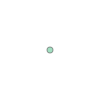

In [3]:
#Calcular las distancia del centroide de las localidades hasta la univerisdad Distrital
from shapely.geometry import Point
#Point(Longitud, Latitud)
universidad=Point(-74.0657395300252, 4.628174917902711)
universidad

In [4]:
#Geodesico (Angulos)
universidad= gpd.GeoSeries(universidad, crs=4326)
universidad

0    POINT (-74.06574 4.62817)
dtype: geometry

In [5]:
#Cartesiano (proyectada)
universidad=universidad.to_crs(epsg=9377)
universidad

0    POINT (4881834.512 2069497.053)
dtype: geometry

In [9]:
#Tomar la distancia desde la universidad distrital a cada uno de los puntos del centroide
gdf_localidades["distancia_u"]=[float(universidad.distance(centroid))/1000 for centroid in gdf_localidades.Centroide]
gdf_localidades

<ipython-input-9-e8217cfee201>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  gdf_localidades["distancia_u"]=[float(universidad.distance(centroid))/1000 for centroid in gdf_localidades.Centroide]


,OBJECTID,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Length,SHAPE_Area,geometry,Area (Km^2),Centroide,distancia_u
0,81,ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((4874618.874 2065659.921, 4874795.124...",4.869648,POINT (4877713.442 2065148.650),5.990979
1,82,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((4873841.563 2065830.436, 4874519.655...",9.891070,POINT (4874035.106 2063614.988),9.768798
2,83,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((4874920.785 2065569.457, 4874949.616...",13.806132,POINT (4876542.907 2062686.661),8.624530
3,84,CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((4881778.345 2066733.979, 4881778.829...",2.056021,POINT (4881127.188 2066009.256),3.558797
4,85,BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((4882785.952 2075978.421, 4882199.321...",11.879074,POINT (4880975.173 2074072.677),4.655620
5,86,TEUSAQUILLO,Acuerdo 8 de 1977,1.419317e+07,13,0.148314,0.001156,"POLYGON ((4878738.750 2073689.146, 4878782.741...",14.164212,POINT (4879615.656 2070936.938),2.645107
6,87,PUENTE ARANDA,Acuerdo 8 de 1977,1.731115e+07,16,0.161116,0.001410,"POLYGON ((4876007.832 2070526.798, 4876369.768...",17.276153,POINT (4876749.147 2068186.463),5.251532
7,88,LOS MARTIRES,Acuerdo 8 de 1977,6.514046e+06,14,0.099382,0.000530,"POLYGON ((4881046.225 2068088.367, 4881014.702...",6.500764,POINT (4879368.270 2067177.915),3.385373
8,89,SUMAPAZ,Acuerdo 9 de 1986,7.809688e+08,20,1.914949,0.063549,"POLYGON ((4866233.277 2029900.424, 4866233.278...",779.469471,POINT (4860516.436 2004145.429),68.740781
9,90,USAQUEN,Acuerdo 8 de 1977 y Res 1751 de 2016,6.520141e+07,01,0.436907,0.005310,"POLYGON ((4887892.280 2073511.921, 4887891.792...",65.065697,POINT (4886050.882 2082061.600),13.253136


<Axes: >

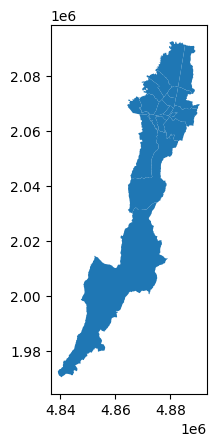

In [10]:
gdf_localidades.plot()

<Axes: >

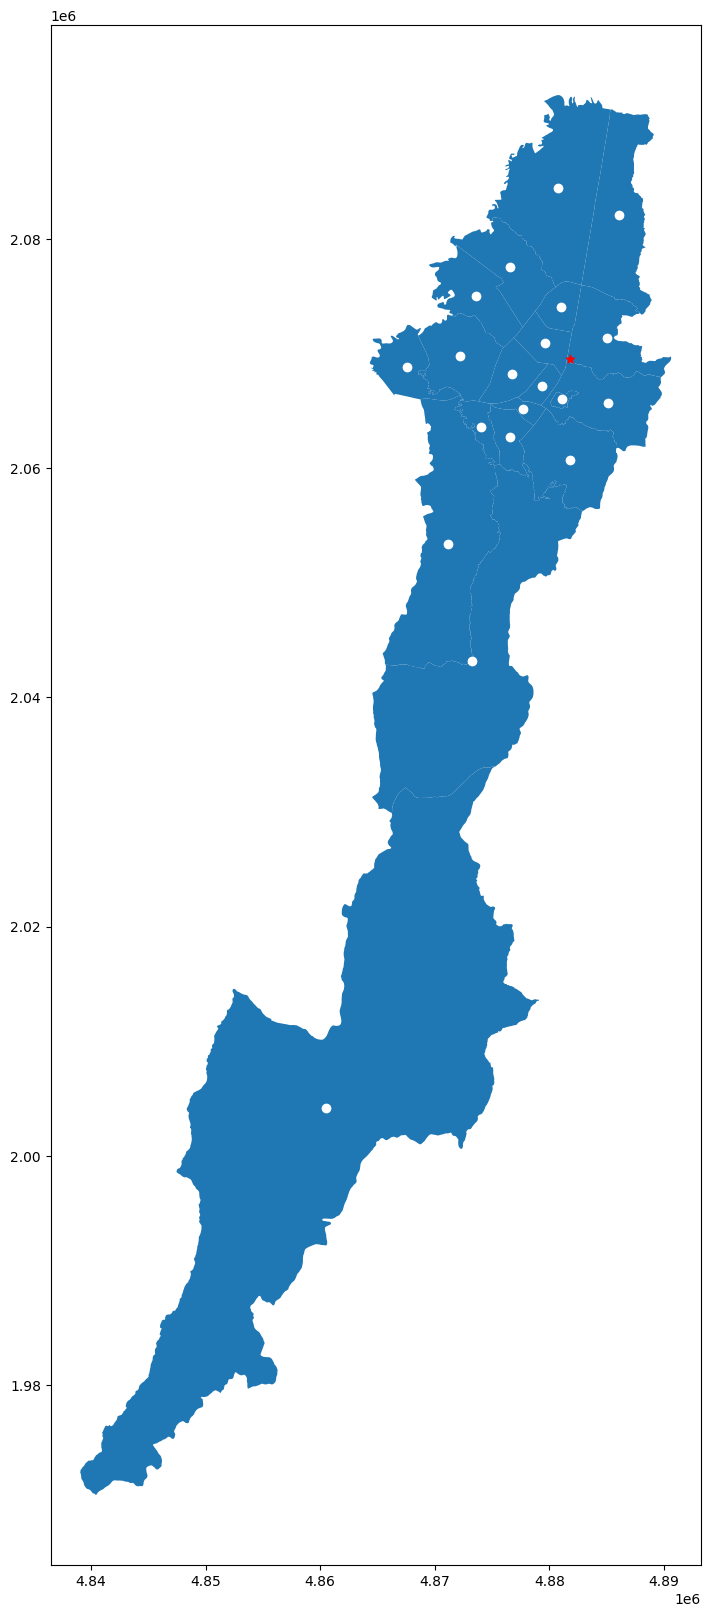

In [13]:
#Agregar capas
mapa=gdf_localidades.plot(figsize=(20,20))
gdf_localidades["Centroide"].plot(ax=mapa, color="white")
universidad.plot(ax=mapa, color="red", marker="*")

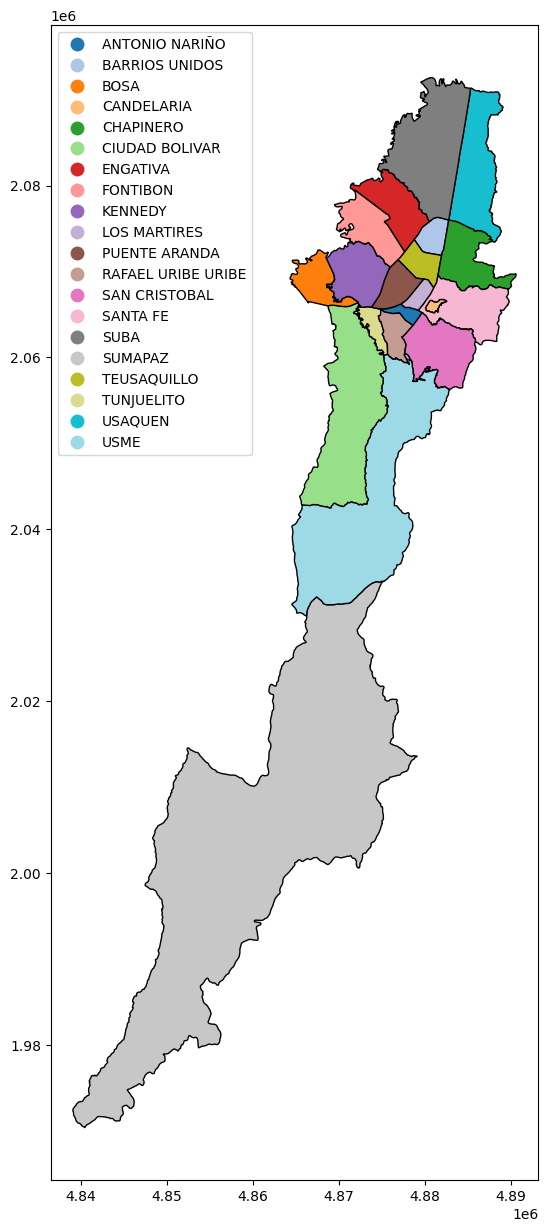

In [19]:
mapa_2=gdf_localidades.plot(
    column='LocNombre',
    figsize=(15,15),
    edgecolor="black",
    cmap='tab20',
    legend=True,
    legend_kwds={
        'loc':'upper left'
    }
)

#Taller
crear un mapa de coropletas de la localidad donde vive y y sus barrios, traerlo en pdf